### Maximum Likelihood Estimation (MLE)

MLE is a technique used for estimating the parameters of a given distribution, using some observed data. 

For example, if a population is known to follow a normal distribution but the mean and variance are unknown, MLE can be used to estimate them using a limited sample of the population, by finding particular values of the mean and variance so that the observation is the most likely result to have occurred. 

MLE is a probabilistic framework for solving the problem of density estimation. It involves maximizing a likelihood function in order to find the probability distribution and parameters that best explain the observed data. See more [here](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

<img src="images/mle_example.gif" width="400">

In [3]:
# import libraries
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

In [26]:
# generate synth. data
N = 100
x = np.linspace(0, 20, N)
noise = np.random.normal(loc = 0.0, scale = 7.5, size = N)
y = 5*x + noise
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

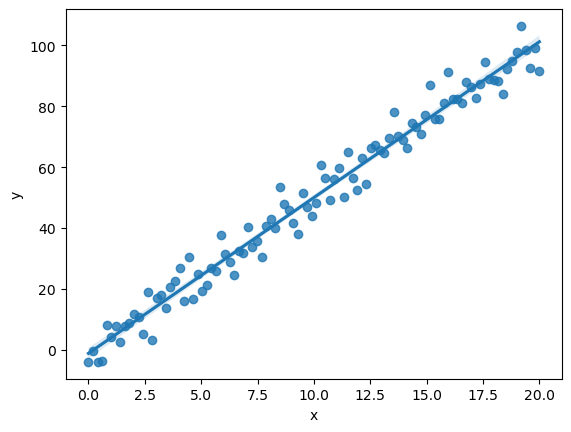

In [24]:
# plot
sns.regplot(data=df, x='x', y='y');

#### Ordinary Least Squares (OLS) benchmark

In [27]:
# Good for regression-like, continuous data
X = df[['constant', 'x']]
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1855.
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           1.76e-65
Time:                        11:44:16   Log-Likelihood:                -330.88
No. Observations:                 100   AIC:                             665.8
Df Residuals:                      98   BIC:                             671.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.2594      1.327      0.195      0.845      -2.374       2.893
x              4.9375      0.115     43.065      0.000       4.710       5.165
==============================================================================
Omnibus:                        0.410   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.496
Skew:                          -0.145   Prob(JB):                        0.780
Kurtosis:                       2.813   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### MLE

The inputs are the guesses we made at our parameters. Afterwards, we can use a Bayesian approach to compute the prob. distrib. function (PDF) of the observed values, taken as normally distributed around the guessed mean `yhat` with std. dev. `sd`.

In [28]:
# define likelihood function
def MLERegression(params):
    intercept, beta, sd = params[0], params[1], params[2]  
    yhat = intercept + beta*x                              
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )
    return(negLL)

In [29]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([6,6,3])
results = minimize(MLERegression, guess, method = 'Nelder-Mead', 
 options={'disp': True})

Optimization terminated successfully.
         Current function value: 330.884869
         Iterations: 115
         Function evaluations: 207


In [30]:
results

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 330.88486887519946
             x: [ 2.594e-01  4.937e+00  6.619e+00]
           nit: 115
          nfev: 207
 final_simplex: (array([[ 2.594e-01,  4.937e+00,  6.619e+00],
                       [ 2.593e-01,  4.937e+00,  6.619e+00],
                       [ 2.593e-01,  4.937e+00,  6.619e+00],
                       [ 2.594e-01,  4.937e+00,  6.619e+00]]), array([ 3.309e+02,  3.309e+02,  3.309e+02,  3.309e+02]))

In [31]:
# drop results into df and round to match statsmodels
results_df = pd.DataFrame({'coef':results['x']})
results_df.index=['constant','x','sigma']   
np.round(results_df.head(2), 3)

,coef
constant,0.259
x,4.937
